#**ETL: Extract, transform, load**



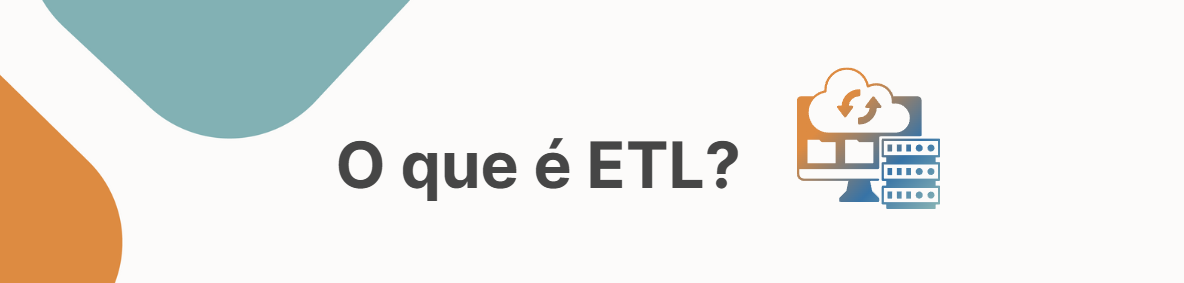

# ETL no Restaurante: Como Aumentar as Gorjetas?


## Introdução - O poder dos dados no restaurante


Imagine que você é o(a) gerente de um restaurante e está buscando formas de aumentar as gorjetas dos clientes.
Você recebeu um conjunto de dados com informações sobre as contas, as gorjetas e os perfis dos clientes.
Sua missão é usar a análise de dados para descobrir padrões e sugerir ações que aumentem a satisfação e, claro, as gorjetas.

Vamos utilizar o processo ETL para transformar esse desafio em uma solução orientada por dados.


# Parte 1: Extração (Extract)


A extração é a primeira etapa do processo ETL (Extract, Transform, Load). Consiste em obter os dados a partir da sua fonte de origem.
Existem diferentes tipos de extração:

1. **De arquivos planos**: como CSV, TXT ou Excel. É comum em ambientes educacionais e análises exploratórias.
2. **De bancos de dados**: conecta-se diretamente a bancos como MySQL, PostgreSQL, Oracle etc.
3. **De APIs**: extrai dados em tempo real ou sob demanda a partir de serviços web.
4. **De páginas web (Web Scraping)**: extrai dados diretamente de sites quando não há uma API disponível.
5. **De armazenamento em nuvem**: como Google Drive, Amazon S3, entre outros.

No nosso caso, faremos a extração a partir de um arquivo CSV disponível na web.


In [1]:
import pandas as pd

# Cargar os dados diretamente desde a fonte

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

df = pd.read_csv(url)

## Parte 1.5: Exploração inicial dos dados


Antes de transformar os dados, é fundamental conhecê-los melhor. Esta etapa de exploração nos ajuda a:

* Identificar possíveis erros ou valores ausentes.
* Entender a distribuição das variáveis.
* Detectar relações interessantes entre colunas.

Vamos usar funções como `head()`, `info()`, `describe()` e visualizações básicas para explorar o dataset.


In [2]:
# Primeiras linhas do conjunto de dados
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* **total\_bill**: Valor total da conta (inclui comida, bebida, etc.).
* **tip**: Gorjeta dada pelo cliente.
* **sex**: Sexo da pessoa que pagou (Male/Female).
* **smoker**: Indica se a pessoa pertence a uma mesa de fumantes (Yes/No).
* **day**: Dia da semana em que a conta foi registrada (Thur, Fri, Sat, Sun).
* **time**: Momento do dia (Lunch ou Dinner).
* **size**: Número de pessoas na mesa.


In [3]:
# Informações gerais das colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
# Estatísticas descritivas básicas
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Parte 2: Transformação (Transform)


A transformação é uma etapa crucial no ETL. Nessa fase, limpamos, combinamos ou enriquecemos os dados para que estejam prontos para a análise.

**Por que transformar?**

* Os dados brutos geralmente têm erros ou estão desorganizados.
* É necessário convertê-los para um formato mais útil ou compreensível.
* Podemos criar novas colunas que revelem informações ocultas (como a porcentagem da gorjeta).


## Funções comuns na fase de transformação (tratamento de dados):

* `df.isnull().sum()`: Verifica valores nulos em cada coluna.
* `df.duplicated().sum()`: Identifica registros duplicados.
* `df.drop_duplicates()`: Remove registros duplicados.
* `df.fillna(valor)`: Preenche valores nulos com um valor específico.
* `df.replace()`: Substitui valores específicos por outros.
* `df.astype()`: Converte o tipo de dado de uma coluna.
* `df['nova_coluna'] = ...`: Permite criar novas colunas derivadas de outras.

Essas funções ajudam a garantir que os dados estejam limpos e prontos para uma análise confiável.

A seguir, veremos exemplos práticos de como aplicar essas funções sem modificar o DataFrame original:


In [5]:
# Verificar valores nulos
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# Verificar valores duplicados
df.drop_duplicates().sum()

total_bill                                              4814.77
tip                                                      729.58
sex           FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMa...
smoker        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
day           SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunS...
time          DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
size                                                        625
dtype: object

In [7]:
# Remover duplicados (sem alterar o df original)
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
# Alterar tipo de dado temporal (exemplo fictício)

# df\['day'] = df\['day'].astype('category')  # se quisermos tratar como categoria

# Este exemplo é apenas para mostrar, não executa nada.

## Novas colunas que revelem informações ocultas


In [9]:
# Criar a coluna de porcentagem da gorjeta
df['type_percentage'] = df['tip'] / df['total_bill'] * 100

In [10]:
# Estatísticas básicas
df.head()

,total_bill,tip,sex,smoker,day,time,size,type_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


# Parte 3: Carga e Análise (Load)


Nessa fase, carregamos os dados em um formato pronto para análise e visualização, com o objetivo de apoiar a tomada de decisões.
Vamos criar gráficos e tabelas para entender melhor os padrões das gorjetas.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Estilo dos gráficos
sns.set_style("whitegrid")

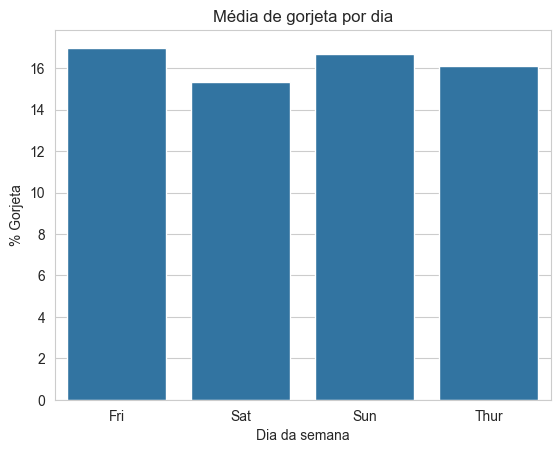

In [14]:
# Gorjeta por dia
df_day = df.groupby("day")["type_percentage"].mean().reset_index() # Criando a visualização, fazendo a média p/ dia
sns.barplot(data=df_day, x="day", y="type_percentage") # Os dados serão extraídos, por isso criamos as variáveis dentro dos ()
plt.title("Média de gorjeta por dia")
plt.ylabel("% Gorjeta")
plt.xlabel("Dia da semana")
plt.show()

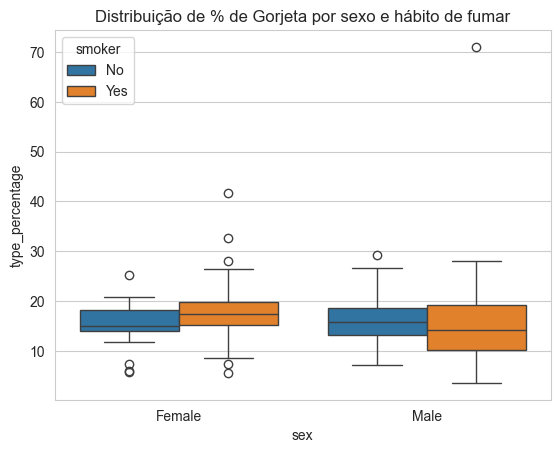

In [15]:
# Gorjeta por sexo e hábito de fumar
sns.boxplot(data=df, x="sex", y="type_percentage", hue="smoker")
plt.title("Distribuição de % de Gorjeta por sexo e hábito de fumar")
plt.show()

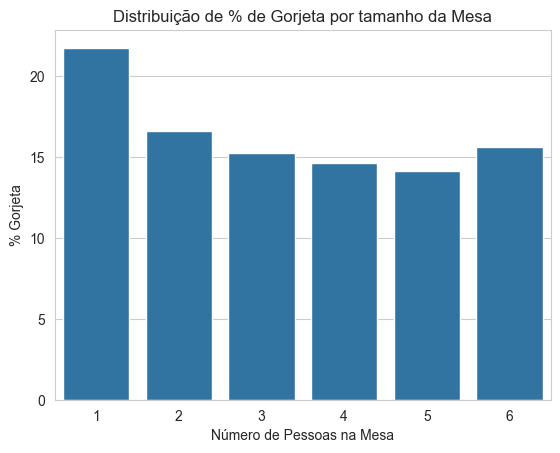

In [16]:
# Gorjeta por tamanho da mesa
sns.barplot(data=df, x="size", y="type_percentage", errorbar=None)
plt.title("Distribuição de % de Gorjeta por tamanho da Mesa")
plt.ylabel("% Gorjeta")
plt.xlabel("Número de Pessoas na Mesa")
plt.show()

Agora que exploramos os dados, é a sua vez de pensar como gerente!

Com base nos gráficos e informações, o que você faria para aumentar a média das gorjetas?

Algumas perguntas para guiar a discussão:

* Em qual dia vale a pena investir em promoções?
* Fumantes tendem a deixar mais gorjeta?
* Mesas maiores deixam mais gorjeta proporcionalmente?
* Homens e mulheres se comportam de maneira diferente?

Deixe suas ideias ou sugestões!



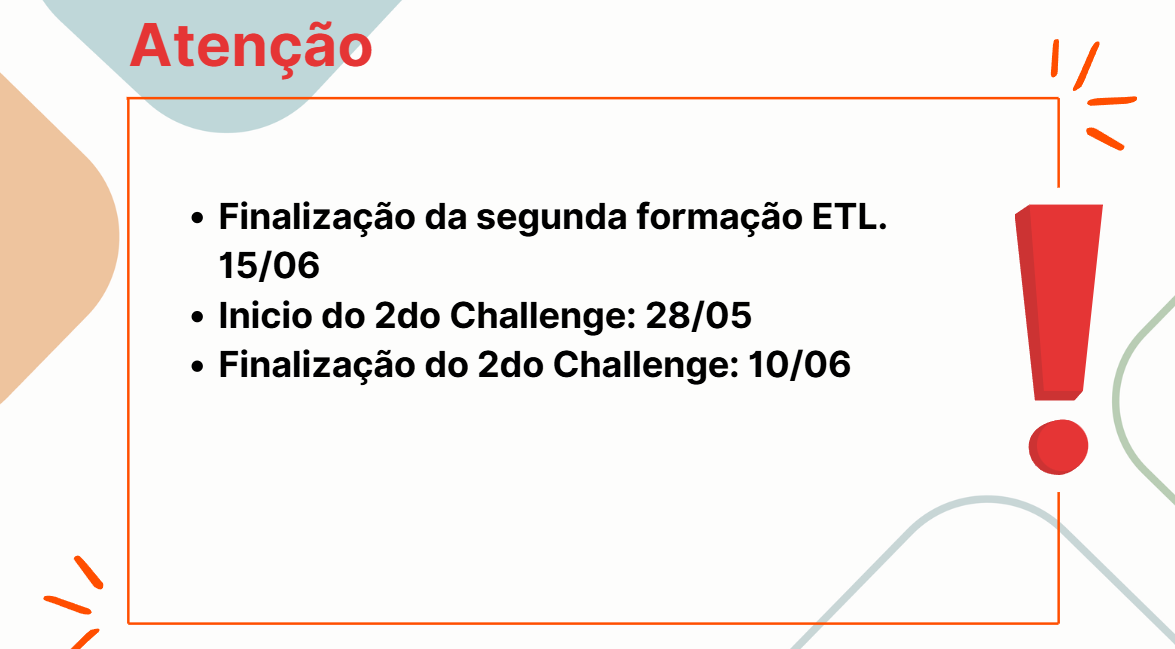